<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/tsp_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Rogerio-mack/Temporal/raw/main/tsp.mplstyle' ])

# Para ver os parâmetros empregados aqui
# plt.rcParams
# plt.rcParams['figure.figsize']

In [1]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [3]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

In [23]:
#@markdown `tspdecompose()`
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

# Exemplos `tspdisplay()`



In [13]:
df = pd.read_csv(path + 'gas_consumption.csv',index_col=0,parse_dates=True)
df.index = pd.to_datetime(df.index)
df = df[ df.index.year > 1965 ]

url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/UKDriverDeaths.csv'
df2 = pd.read_csv(url, usecols=['time','value'], index_col=['time'])
index_dates = pd.date_range(start='01/01/1969', end='01/01/1985', freq='M')
df2.index = index_dates



In [19]:
UKDriveDeaths = df2

tspdisplay('UKDriveDeaths')

,value
1969-01-31,1687
1969-02-28,1508
1969-03-31,1507
1969-04-30,1385
1969-05-31,1632


In [10]:
tspdisplay('df1','df2','df1.diff()')

,gas_consumption
1966-01-01,41542.774
1967-01-01,44643.178
1968-01-01,48791.133
1969-01-01,53682.306
1970-01-01,58537.494
,value
1969-01-31,1687
1969-02-28,1508
1969-03-31,1507
1969-04-30,1385


In [14]:
display(df.head())
display(df2.head())
display(df.diff().head())

,gas_consumption
1966-01-01,41542.774
1967-01-01,44643.178
1968-01-01,48791.133
1969-01-01,53682.306
1970-01-01,58537.494


,value
1969-01-31,1687
1969-02-28,1508
1969-03-31,1507
1969-04-30,1385
1969-05-31,1632


,gas_consumption
1966-01-01,NaN
1967-01-01,3100.404
1968-01-01,4147.955
1969-01-01,4891.173
1970-01-01,4855.188


# Exemplos `tspplot()`

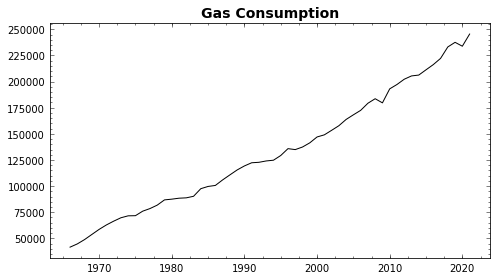

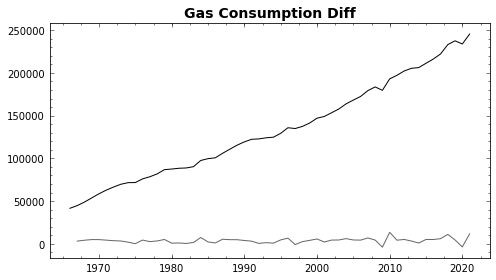

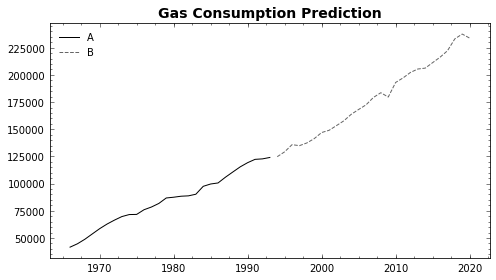

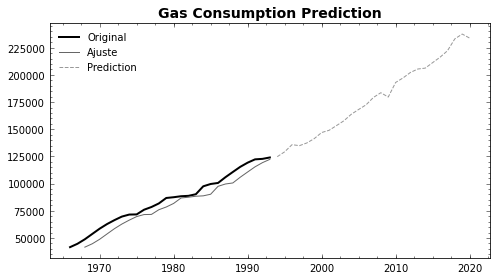

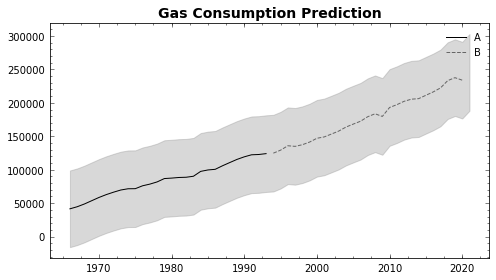

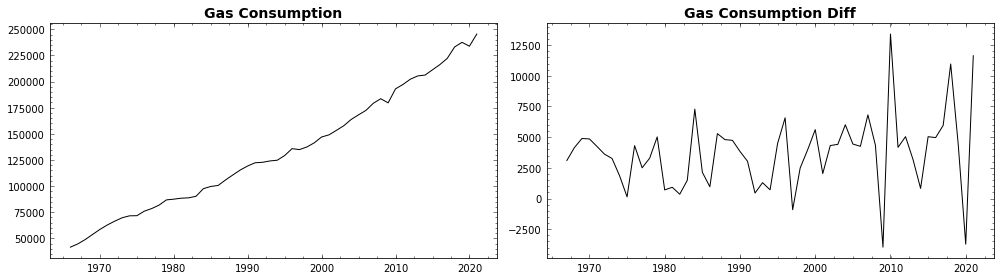

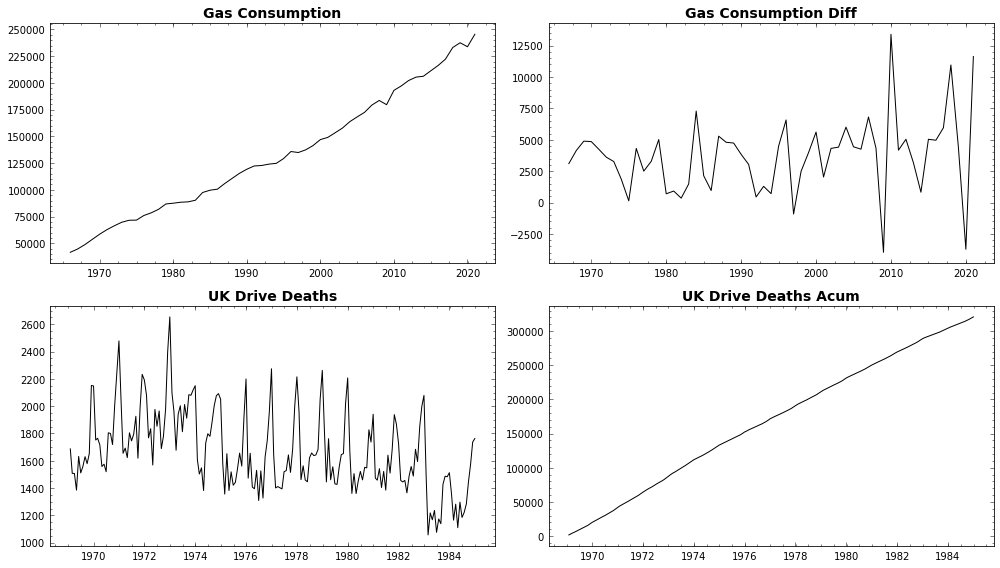

In [22]:
tspplot(df,title='Gas Consumption')

fig, ax = plt.subplots()
tspplot(df,title='Gas Consumption',ax=ax)
tspplot(df.diff(),title='Gas Consumption Diff',ax=ax)

fig, ax = plt.subplots()
tspplot(df.iloc[0:len(df)//2],title='Gas Consumption',ax=ax,label='A')
tspplot(df.iloc[len(df)//2:-1],title='Gas Consumption Prediction',ax=ax,linestyle='dashed',label='B')

fig, ax = plt.subplots()
tspplot(df.iloc[0:len(df)//2],title='Gas Consumption',ax=ax,label='Original',lw=2)
tspplot(df.iloc[0:len(df)//2].shift(2),title='Gas Consumption',ax=ax,label='Ajuste')
tspplot(df.iloc[len(df)//2:-1],title='Gas Consumption Prediction',ax=ax,linestyle='dashed',label='Prediction')

fig, ax = plt.subplots()
tspplot(df.iloc[0:len(df)//2],title='Gas Consumption',ax=ax,label='A')
tspplot(df.iloc[len(df)//2:-1],title='Gas Consumption Prediction',ax=ax,linestyle='dashed',label='B')
ax.fill_between(df.index, df[ df.columns[0] ] - df[ df.columns[0] ].std(),  df[ df.columns[0] ] + df[ df.columns[0] ].std(), color='grey', alpha=.3)
plt.show() # somente aqui você precisa do plt.show() por conta do fill_ antes

fig, ax = plt.subplots(1,2,figsize=(14,4))
tspplot(df,title='Gas Consumption',ax=ax[0])
tspplot(df.diff(),title='Gas Consumption Diff',ax=ax[1])

fig, ax = plt.subplots(2,2,figsize=(14,8))
tspplot(df,title='Gas Consumption',ax=ax[0,0])
tspplot(df.diff(),title='Gas Consumption Diff',ax=ax[0,1])
tspplot(df2,title='UK Drive Deaths',ax=ax[1,0])
tspplot(df2.cumsum(),title='UK Drive Deaths Acum',ax=ax[1,1])


# Exemplos `tspdecompose()`

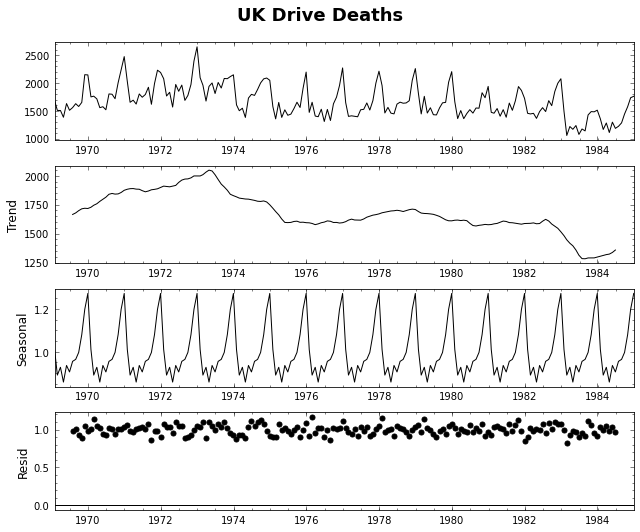

In [24]:
tspdecompose(df2,title='UK Drive Deaths')